# Team Project, Group One

## 1. Obtain a large classification database. 

#### ANSWER
Our dataset is called "customer_churn_dataset.csv". 
It has 20,000 rows, which are synthetic customer information.
It also has 11 features, for churn prediction.
The URL of the dataset is here: 
https://www.kaggle.com/datasets/sonalshinde123/customer-churn-prediction-dataset?select=customer_churn_dataset.csv

In [126]:
# Loading the customer chrun data into a data frame

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # a library for data visualization
import seaborn as sns # great for making informative plots more easily

from sklearn.preprocessing import StandardScaler # scaling numerical columns
from sklearn.model_selection import train_test_split # splitting data to training & test sets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv("customer_churn_dataset.csv")

In [127]:
df.head() # A quick overview of the first five rows to understand the structure and sample data 

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [128]:
df.info() # A quick structural snapshot of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [129]:
df.shape # The exact dimensions of the dataset 

(20000, 11)

# 2. Provide a description of the dataset, including explanation of various features.


#### ANSWER
This dataset provides symthetic customer churn information. It simulates real-world telecom customer behavior. In also includes controlled randomness and noise to avoid perfect patterns and to make it suitable for beginner machine learning task of customer churn prediction using machine learning models.

The dataset is generated using business-driven rules based on features such as customer tenure, billing amount, contract type, etc.   

Some of the features are as follows:  
"tenure", how long customers have been a customer in months 
"monthly_charges", their monthly bill 
"total_charges", the amount they have paid in total 
"Contract", whether they are month-to-month or on a longer plan 
"Payment_method", how how they pay, i.e. credit or debit  
"Internet_service", such as Fiber, etc. 
"tech_support", whether they have received tech support 
"Support_calls", the number of times they have called support.  

The target feature "churn", which is a Yes/No field, indicates whether they are still with the company or they have left.  

This dataset is a mix of numerical and categorical features for churn prediction.  

# 3. Pre-process and clean the dataset as appropriate

#### First, checking for missing values

In [130]:
df.isnull().sum() # checking for missing values in every column 

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [131]:
# The "internet_service" has 2013 missing values, which is a moderate amount.
mode_value = df['internet_service'].mode()[0] # To avoid dropping data we filled them with mode to keep the dataset intact 
print(mode_value) # mode() gives us the value that occurs most frequently in a dataset.
df['internet_service'] = df['internet_service'].fillna(mode_value) # replacing all the missing values with the most frequent category
df.isnull().sum() # making sure that there is no more missing values

Fiber


customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [132]:
df.duplicated().sum() # checking for duplicate rows

np.int64(0)

#### Second, Converting categorical features into numerical

In [133]:
categorical_columns = df.select_dtypes(include='object').columns # Identifying categorical features (columns)
print(categorical_columns) 

Index(['contract', 'payment_method', 'internet_service', 'tech_support',
       'online_security', 'churn'],
      dtype='object')


In [134]:
df = pd.get_dummies(df, columns=['contract', 'payment_method', 'internet_service', 'tech_support', 'online_security']) # Converting categorical features into numerical form using one-hot encoding
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0}) # converting the target value to numerical
df.shape # given the one-hot encoding we are going to have new columns 

(20000, 19)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              20000 non-null  int64  
 1   tenure                   20000 non-null  int64  
 2   monthly_charges          20000 non-null  float64
 3   total_charges            20000 non-null  float64
 4   support_calls            20000 non-null  int64  
 5   churn                    20000 non-null  int64  
 6   contract_Month-to-month  20000 non-null  bool   
 7   contract_One year        20000 non-null  bool   
 8   contract_Two year        20000 non-null  bool   
 9   payment_method_Cash      20000 non-null  bool   
 10  payment_method_Credit    20000 non-null  bool   
 11  payment_method_Debit     20000 non-null  bool   
 12  payment_method_UPI       20000 non-null  bool   
 13  internet_service_DSL     20000 non-null  bool   
 14  internet_service_Fiber

In [136]:
columns_to_drop = ['churn']
if 'customer_id' in df.columns: 
    columns_to_drop.append('customer_id') # First check if the column exists before dropping it

X = df.drop(columns=columns_to_drop)  # Separating X and y before scaling
y = df['churn']

numeric_cols = X.select_dtypes(include='number').columns  # Identifying all the numerical columns
scaler = StandardScaler()  # adjusts every value so they have a mean of zero and a standard deviation of one.
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

#### Third, Detecting the outlier values 

In [137]:
z_scores = np.abs((df - df.mean()) / df.std()) # calculating the absolute z-scores
outliers = z_scores > 3 # choosing 3 is a rule of thumb
print(outliers.sum().sum()) # repeating sum once for a row and once for a column
df = df[~outliers.any(axis=1)] # keeping all the rows that are NOT outliers

136


#### Fourth, feature selection 

In [138]:
# Remove unwanted features
features_to_remove = ['customer_id', 'total_charges', 'payment_method', 'payment_method_Cash', 'payment_method_Debit', 'payment_method_UPI', 'payment_method_Credit' ]
for col in features_to_remove:
    if col in df.columns:
        df = df.drop(columns=[col])

In [139]:
df

,tenure,monthly_charges,support_calls,churn,contract_Month-to-month,contract_One year,contract_Two year,internet_service_DSL,internet_service_Fiber,tech_support_No,tech_support_Yes,online_security_No,online_security_Yes
0,52,54.20,1,0,True,False,False,True,False,True,False,False,True
1,15,35.28,2,0,True,False,False,True,False,True,False,True,False
2,72,78.24,0,0,True,False,False,True,False,True,False,True,False
3,61,80.24,0,0,False,True,False,False,True,False,True,False,True
4,21,39.38,4,1,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,36,69.51,0,1,False,False,True,True,False,True,False,False,True
19996,10,59.88,1,0,True,False,False,False,True,False,True,True,False
19997,6,42.96,2,0,True,False,False,False,True,True,False,True,False
19998,7,102.85,2,0,True,False,False,True,False,False,True,True,False


#### Fifth, spilitting dataset into train (80%) and test (20%) sets

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16000, 17)
(16000,)
(4000, 17)
(4000,)


#### Sixth, Visualizing churn distribution to check for imbalance

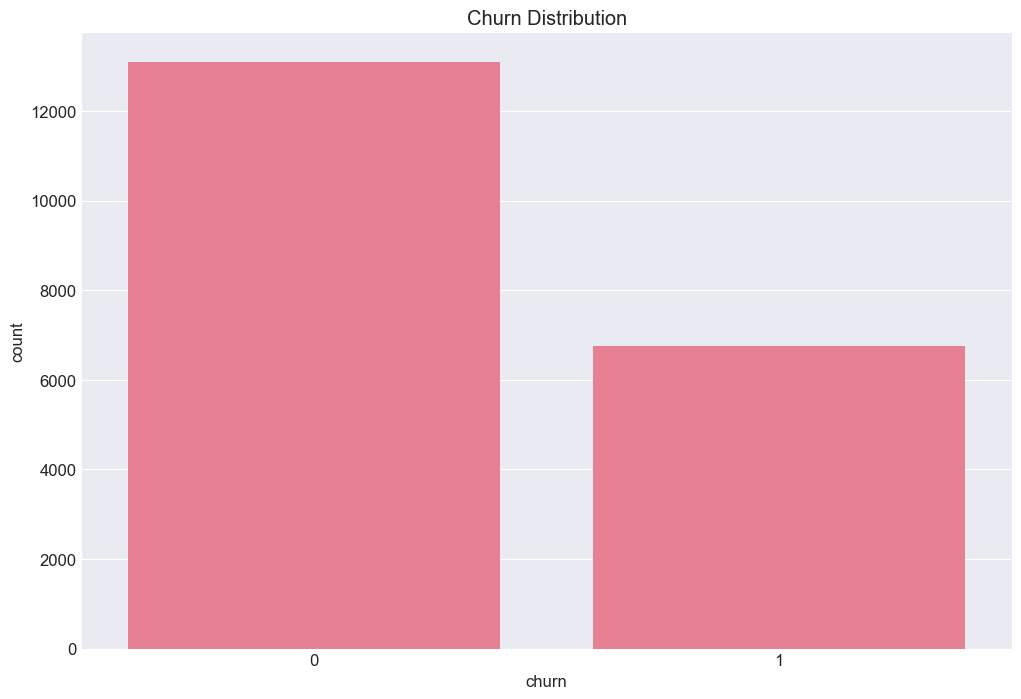

In [141]:
plt.figure()
sns.countplot(x="churn", data=df) # Showing the distribution of churned vs non-churned customers
plt.title("Churn Distribution")
plt.show()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19865 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tenure                   19865 non-null  int64  
 1   monthly_charges          19865 non-null  float64
 2   support_calls            19865 non-null  int64  
 3   churn                    19865 non-null  int64  
 4   contract_Month-to-month  19865 non-null  bool   
 5   contract_One year        19865 non-null  bool   
 6   contract_Two year        19865 non-null  bool   
 7   internet_service_DSL     19865 non-null  bool   
 8   internet_service_Fiber   19865 non-null  bool   
 9   tech_support_No          19865 non-null  bool   
 10  tech_support_Yes         19865 non-null  bool   
 11  online_security_No       19865 non-null  bool   
 12  online_security_Yes      19865 non-null  bool   
dtypes: bool(9), float64(1), int64(3)
memory usage: 950.6 KB


In [ ]:
# memory reduce to 950kb

In [ ]:
#benefits of selCting important feature
Customer ID: Should likely be dropped as it's just an identifier, not a predictive feature
Why total charges total_charges - correlated with tenure × monthly_charges
2-5x faster training, 60-80% less memory usage
1-3% better recall (your specific finding!)
Much faster predictions
Easier model interpretation
Cheaper deployment
Faster experimentation

#### Seventh, Expoloring data: finding relationships and distributions 

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [122]:
# Set style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

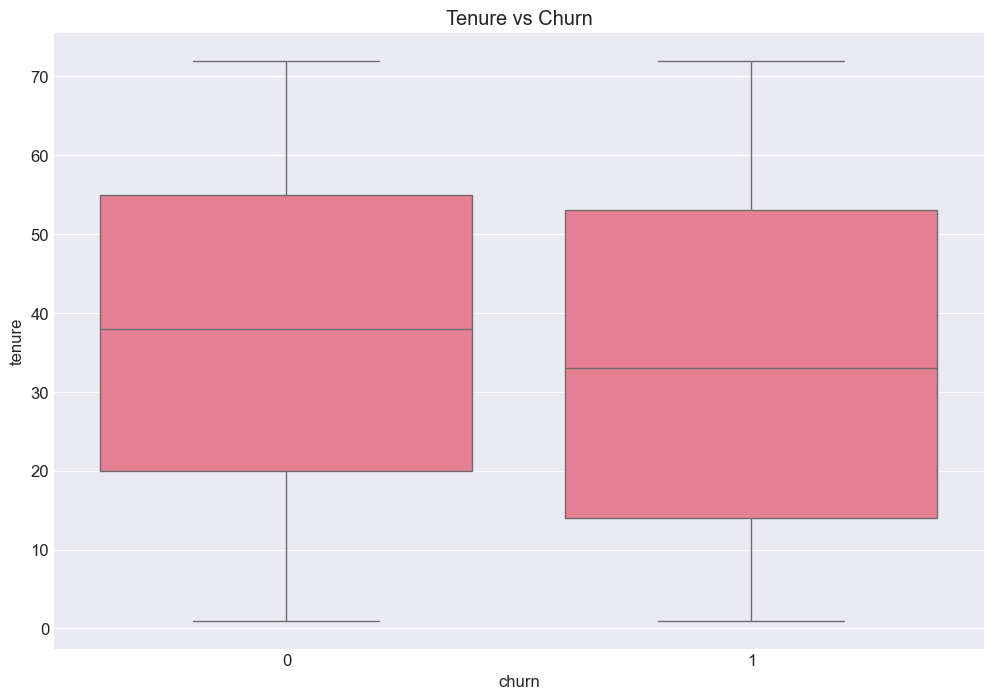

In [125]:
plt.figure()
sns.boxplot(x="churn", y="tenure", data=df) # helping us spot whether shorter or longer tenure are associated with churn
plt.title("Tenure vs Churn")
plt.show()

# 4. Use following approaches for classification of the dataset:
# A. Logistic Regression
# B. Decision Tree
# C. Random Forest
# D. SGD
# E. SVM

# 4.A Logistic Regression

In [69]:
model = LogisticRegression(max_iter=1000) # Initialize the model, allowing it to run up to 1,000 iterations
 
model.fit(X_train, y_train) # Training the Logistic Regression on our data 

y_pred = model.predict(X_test) # Making predictions on unseen data (test dataset)

accuracy = accuracy_score(y_test, y_pred) # Evaluate the model
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}") # Printing results
print(report)

Accuracy: 0.79025
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2645
           1       0.76      0.55      0.64      1355

    accuracy                           0.79      4000
   macro avg       0.78      0.73      0.75      4000
weighted avg       0.79      0.79      0.78      4000



#### About 77% of customers in the test set were classified correctly as churn or non-churn

# 4.B Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7375
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2645
           1       0.61      0.62      0.62      1355

    accuracy                           0.74      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.74      0.74      0.74      4000



#### About 74% of customers in the test set were classified correctly as churn or non-churn

# 4.C Random Forest

In [71]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8425
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2645
           1       0.83      0.67      0.74      1355

    accuracy                           0.84      4000
   macro avg       0.84      0.80      0.82      4000
weighted avg       0.84      0.84      0.84      4000



In [72]:
#### the random forest model classified about 84% of customers correctly
#### The Random Forest outperformed our logistic regression and decision tree

# 4.D SGD

In [73]:
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.77875
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2645
           1       0.70      0.61      0.65      1355

    accuracy                           0.78      4000
   macro avg       0.76      0.74      0.74      4000
weighted avg       0.77      0.78      0.77      4000



In [74]:
#### Your stochastic gradient descent classifier returns 77% accuracy.
#### It is lower than our Random Forest model but similar to our Logistic Regression. 

# 4.E SVM

In [75]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.82875
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2645
           1       0.84      0.61      0.71      1355

    accuracy                           0.83      4000
   macro avg       0.83      0.78      0.79      4000
weighted avg       0.83      0.83      0.82      4000



In [76]:
#### SVM gave us about 83% accuracy.

#### Conclusion
Random forests gave us the highest accuracy. SVM was the second best. 
Logistic regression and SGD are simple but less accurate. 
Our model selection should be based on accuracy and complexity. 
In our clase, Random Forest’s performance makes it the best choice.

# 5. Use GridSearchCV to tune the parameter of each of the above models. Can you obtain better results in this step for any of the models? Discuss your observations.

# 6. Randomly (or based on certain hypothesis) remove some features and             re-evaluate the models. Document your observations with respect to models performances.

# 7. Present your work in-person including approach and findings during the class on February 3rd, 2026. Each group will have a maximum of 15 minutes to present their project. It is advised that your PowerPoint files to be no longer than 15 slides.


# 8. Prepare a written technical report of no longer than 15 pages to summarize and discuss all steps involved in the project such as the problem statement, various steps conducted, summary of findings, conclusions, etc. Submit the report and the notebook file (with proper headings, explanatory comments and code sections) by the midnight of February 8th, 2026.